# EDA of our data

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob

/Users/pranavpatil/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading dataset

In [2]:
data = pd.read_csv('/Users/pranavpatil/Documents/FALL_2024 /ADVANCED NLP - 5800/Project/Product-Categorization/data/cleaned_data.csv')

### Step 1: General Overview

In [3]:
def general_overview(df):
    """
    Provides basic information about the dataset including shape, data types,
    missing values, and summary statistics.
    """
    print("Dataset Overview:")
    print("Shape of the dataset:", df.shape)
    print("\nColumn Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe())

general_overview(data)

Dataset Overview:
Shape of the dataset: (2456, 6)

Column Data Types:
Unnamed: 0        int64
title            object
description      object
features         object
main_category    object
content          object
dtype: object

Missing Values:
Unnamed: 0       0
title            0
description      0
features         0
main_category    0
content          0
dtype: int64

Summary Statistics:
        Unnamed: 0
count  2456.000000
mean   4074.437296
std    2042.033095
min       8.000000
25%    1949.750000
50%    4004.500000
75%    6028.250000
max    7998.000000


### Step 2: Textual Analysis


Analyzing Column: title
Top 5 most frequent terms:
-       740
for     492
and     342
with    340
of      313
Name: count, dtype: int64


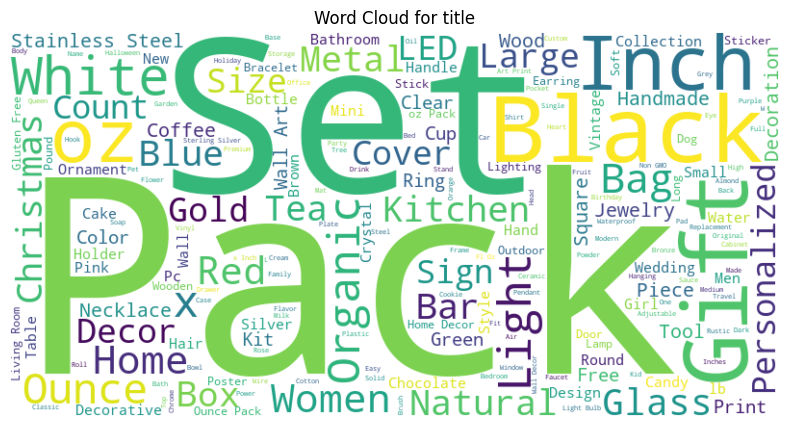


Analyzing Column: description
Top 5 most frequent terms:
and    7344
the    6448
to     4826
a      4490
of     3902
Name: count, dtype: int64


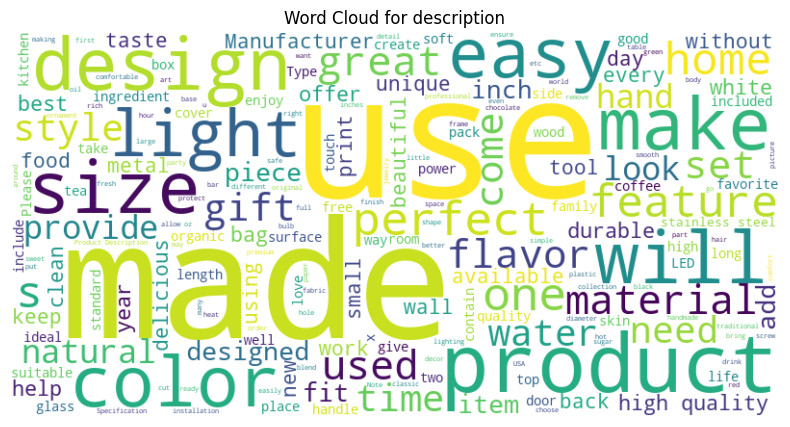


Analyzing Column: features
Top 5 most frequent terms:
and    5664
the    3516
to     3266
for    2875
a      2604
Name: count, dtype: int64


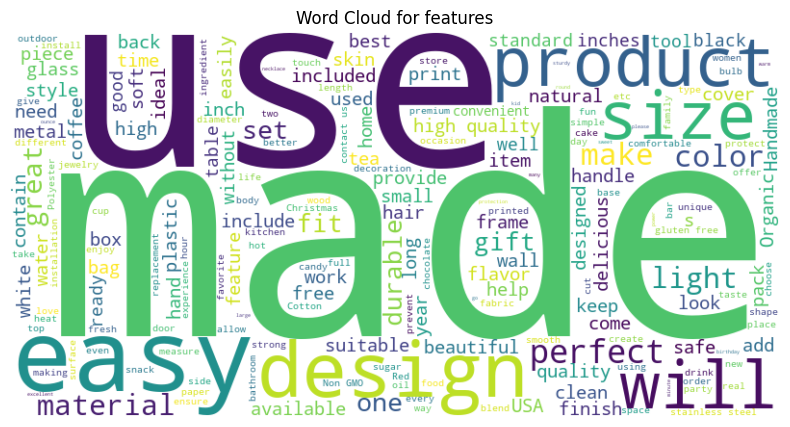


Analyzing Column: content
Top 5 most frequent terms:
make      2595
use       2250
x         1977
light     1607
design    1531
Name: count, dtype: int64


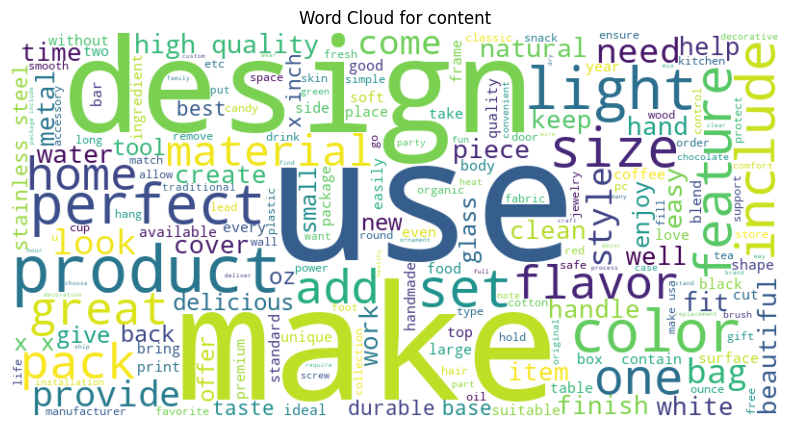

In [4]:
def textual_analysis(df, text_columns):
    """
    Generates word clouds for text-based columns and prints basic statistics.
    
    Parameters:
    df (pd.DataFrame): Dataframe containing the text columns.
    text_columns (list): List of columns to analyze.
    """
    for col in text_columns:
        print(f"\nAnalyzing Column: {col}")
        print("Top 5 most frequent terms:")
        word_freq = pd.Series(' '.join(df[col].dropna()).split()).value_counts().head()
        print(word_freq)

        # Generate and display word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[col].dropna()))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for {col}")
        plt.show()

text_columns = ['title', 'description', 'features', 'content']
textual_analysis(data, text_columns)

### Step 3: Category Distribution


Category Distribution in main_category:
main_category
Grocery                     578
Tools & Home Improvement    551
Amazon Home                 526
Handmade                    339
Health & Personal Care      260
All Beauty                  120
fashion                      80
Digital Music                 2
Name: count, dtype: int64


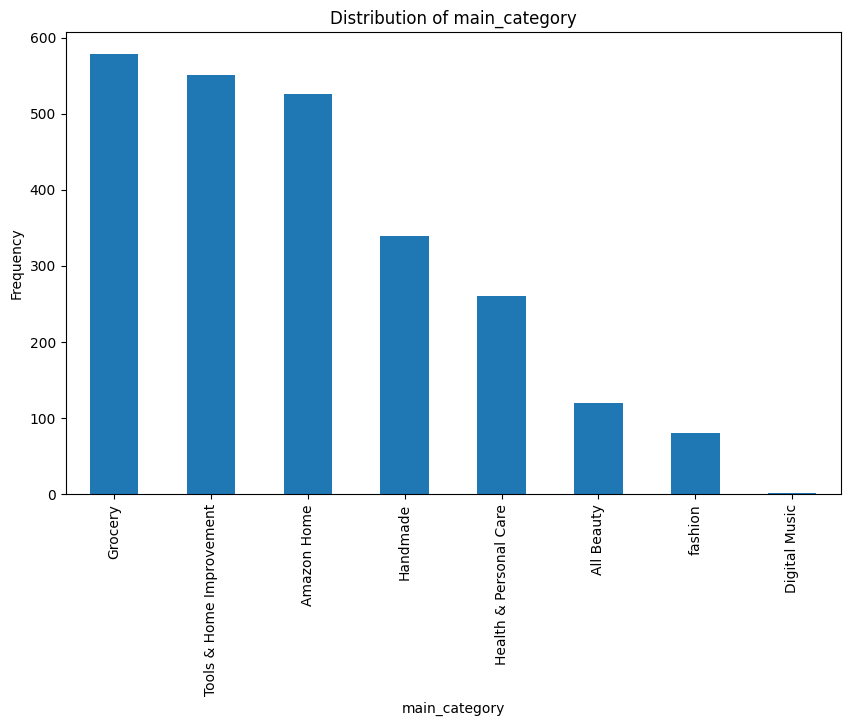

In [5]:
def plot_category_distribution(df, category_column):
    """
    Plots the distribution of categories in a specified column.
    
    Parameters:
    df (pd.DataFrame): Dataframe containing the category column.
    category_column (str): Name of the column with categorical data.
    """
    print(f"\nCategory Distribution in {category_column}:")
    print(df[category_column].value_counts())

    # Plot distribution
    df[category_column].value_counts().plot(kind='bar', figsize=(10, 6))
    plt.title(f"Distribution of {category_column}")
    plt.xlabel(category_column)
    plt.ylabel("Frequency")
    plt.show()

plot_category_distribution(data, 'main_category')

### Step 4: Feature Relationships


Correlation Matrix:
            Unnamed: 0
Unnamed: 0         1.0


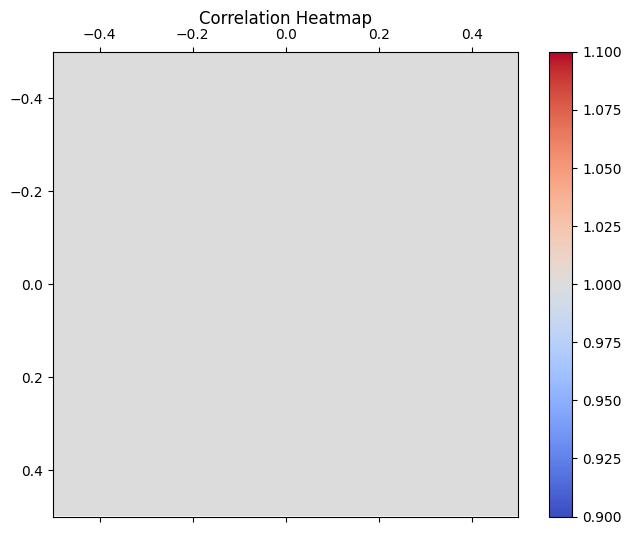

In [6]:
def feature_relationships(df):
    """
    Examines relationships between features, including correlations and any patterns.
    This is limited to numeric or easily transformable columns.
    
    Parameters:
    df (pd.DataFrame): Dataframe to analyze.
    """
    # Correlation matrix for numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_df.empty:
        print("\nCorrelation Matrix:")
        print(numeric_df.corr())

        # Plot correlation heatmap
        plt.figure(figsize=(8, 6))
        plt.matshow(numeric_df.corr(), cmap='coolwarm', fignum=1)
        plt.colorbar()
        plt.title("Correlation Heatmap", pad=20)
        plt.show()
    else:
        print("No numeric columns found for correlation analysis.")

feature_relationships(data)

### Step 5: TF-IDF Analysis


Performing TF-IDF Analysis on Column: content
        Term      Score
522     make  74.755437
939      use  66.529222
443     inch  63.016443
498    light  62.922872
373     gift  56.700025
239   design  56.066822
688  product  54.915282
814     size  50.097414
612     pack  46.617959
611       oz  46.477849


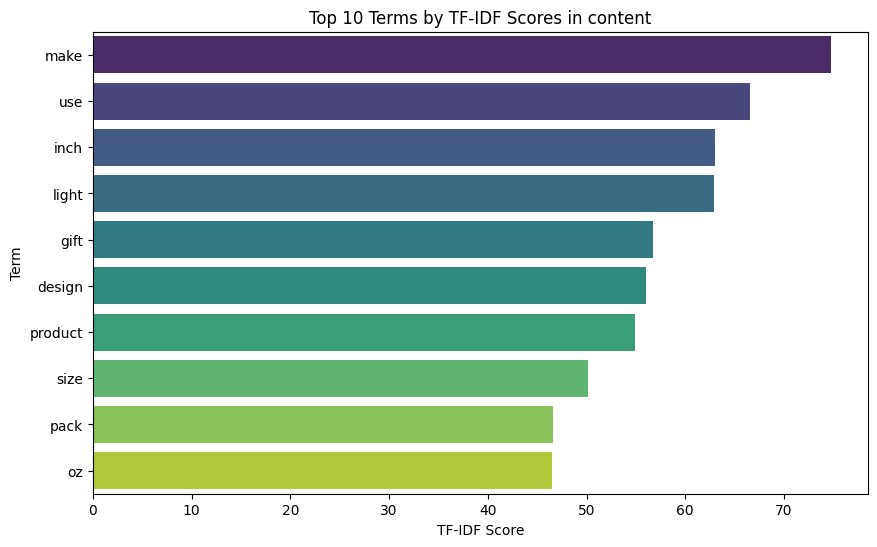

In [7]:
def tfidf_analysis(df, text_column, top_n=10):
    """
    Performs TF-IDF analysis on a text column to identify important words/phrases.

    Parameters:
    df (pd.DataFrame): Dataframe containing the text column.
    text_column (str): Name of the text column to analyze.
    top_n (int): Number of top terms to display.
    """
    print(f"\nPerforming TF-IDF Analysis on Column: {text_column}")

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(df[text_column].dropna())

    # Get feature names and their TF-IDF scores
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1

    # Create a DataFrame of terms and scores
    tfidf_df = pd.DataFrame({'Term': feature_names, 'Score': tfidf_scores})
    tfidf_df = tfidf_df.sort_values(by='Score', ascending=False).head(top_n)

    print(tfidf_df)

    # Plot the top terms
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='Term', data=tfidf_df, palette='viridis')
    plt.title(f"Top {top_n} Terms by TF-IDF Scores in {text_column}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Term")
    plt.show()

# Perform TF-IDF analysis on the 'content' column
tfidf_analysis(data, 'content')

### Step 6: Sentiment Analysis


Performing Sentiment Analysis on Column: description


/Users/pranavpatil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


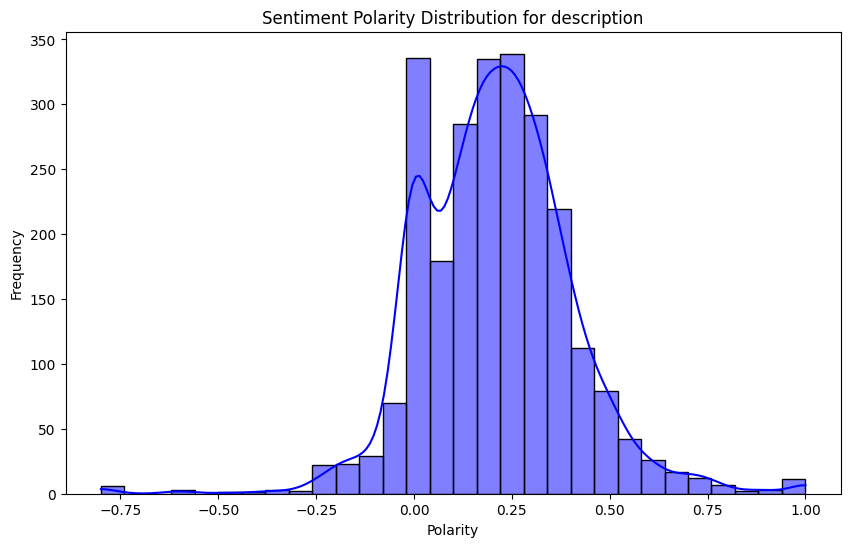

/Users/pranavpatil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


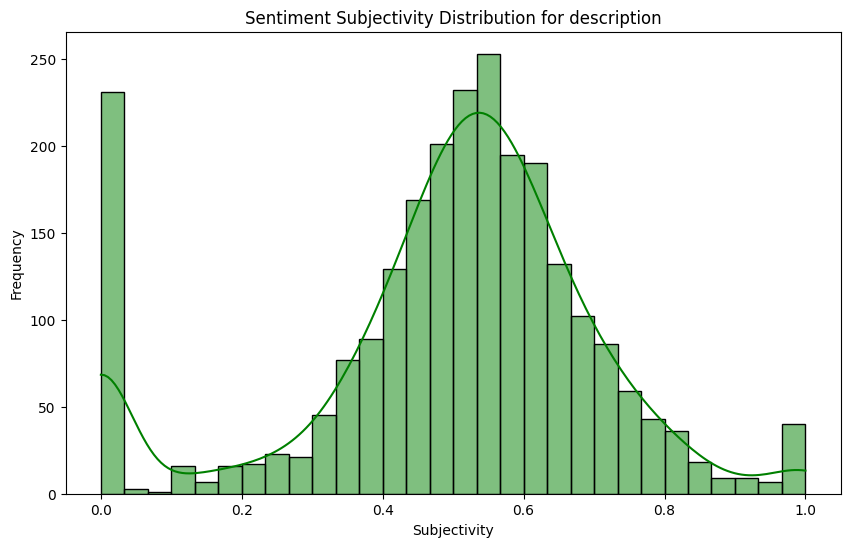

In [8]:
def sentiment_analysis(df, text_column):
    """
    Performs sentiment analysis on a specified text column and visualizes overall sentiment trends.

    Parameters:
    df (pd.DataFrame): Dataframe containing the text column.
    text_column (str): Name of the text column to analyze.
    """
    print(f"\nPerforming Sentiment Analysis on Column: {text_column}")

    # Calculate sentiment polarity and subjectivity
    df['polarity'] = df[text_column].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
    df['subjectivity'] = df[text_column].dropna().apply(lambda x: TextBlob(x).sentiment.subjectivity)

    # Plot sentiment polarity distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['polarity'], kde=True, bins=30, color='blue')
    plt.title(f"Sentiment Polarity Distribution for {text_column}")
    plt.xlabel("Polarity")
    plt.ylabel("Frequency")
    plt.show()

    # Plot sentiment subjectivity distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['subjectivity'], kde=True, bins=30, color='green')
    plt.title(f"Sentiment Subjectivity Distribution for {text_column}")
    plt.xlabel("Subjectivity")
    plt.ylabel("Frequency")
    plt.show()

# Perform sentiment analysis on the 'description' column
sentiment_analysis(data, 'description')